# Alzheimer Prediction using Convolutional Neural Network 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<font size=5> Data Importation </font>

In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pathlib 
import random

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/BME 2121 Mini Project/Dataset/'
data_dir = pathlib.Path(path)

<font size=5> Getting class names </font>

In [ ]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
        'Very_Mild_Demented']], dtype='<U18')

<font size=5> Total number of images </font>

In [ ]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

6400

<font size=5> Example Image </font>

In [ ]:
def plot(path,class_name):
    print(path)
    plt.figure(figsize=(8,8))
    
    img = plt.imread(path)
    
    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: "+class_name)
    plt.imshow(img)

/content/drive/MyDrive/Colab Notebooks/BME 2121 Mini Project/Dataset/Mild_Demented/mild_59.jpg


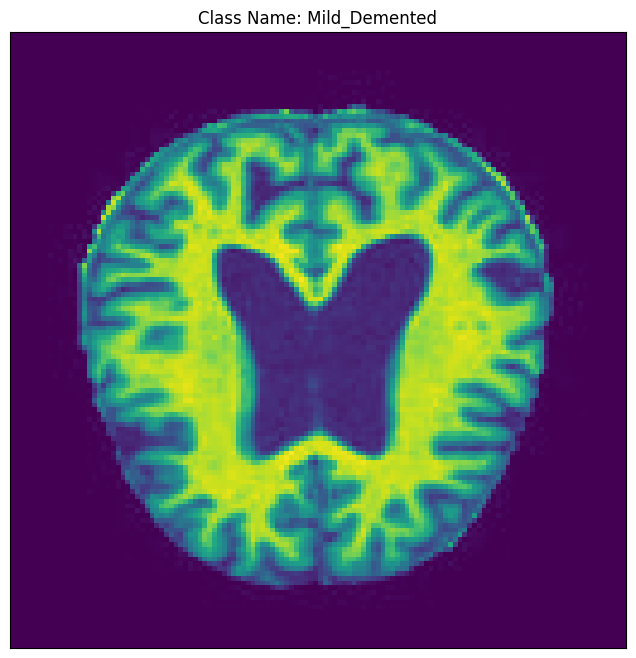

In [ ]:
Mild_Demented = random.choice(list(data_dir.glob("Mild_Demented/*.jpg")))

plot(str(Mild_Demented),"Mild_Demented")

/content/drive/MyDrive/Colab Notebooks/BME 2121 Mini Project/Dataset/Moderate_Demented/moderate_21.jpg


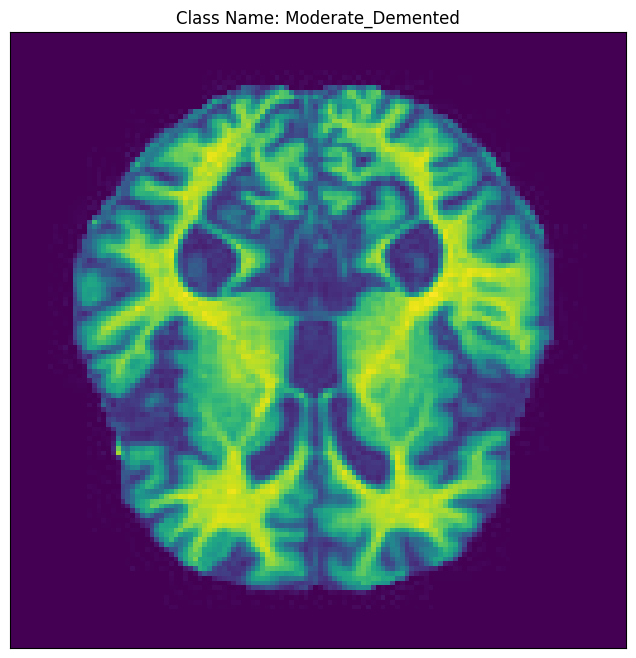

In [ ]:
Moderate_Demented = random.choice(list(data_dir.glob("Moderate_Demented/*.jpg")))

plot(str(Moderate_Demented),"Moderate_Demented")

/content/drive/MyDrive/Colab Notebooks/BME 2121 Mini Project/Dataset/Non_Demented/non_973.jpg


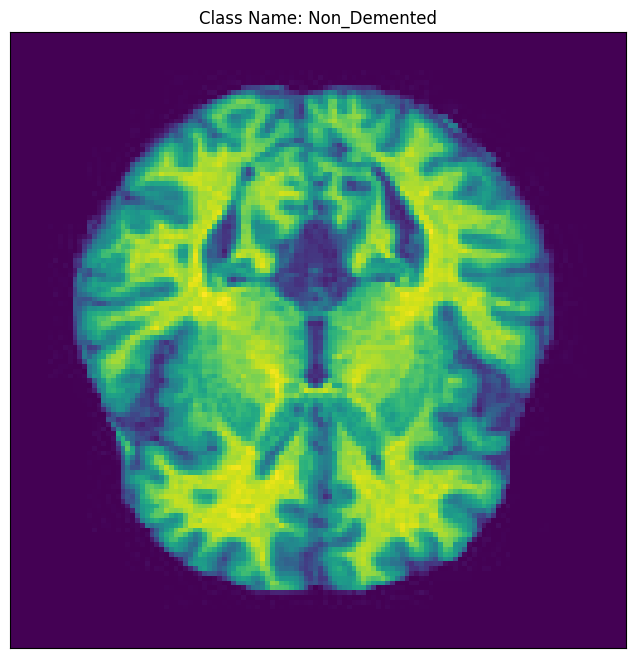

In [ ]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))

plot(str(Non_Demented),"Non_Demented")

/content/drive/MyDrive/Colab Notebooks/BME 2121 Mini Project/Dataset/Very_Mild_Demented/verymild_2217.jpg


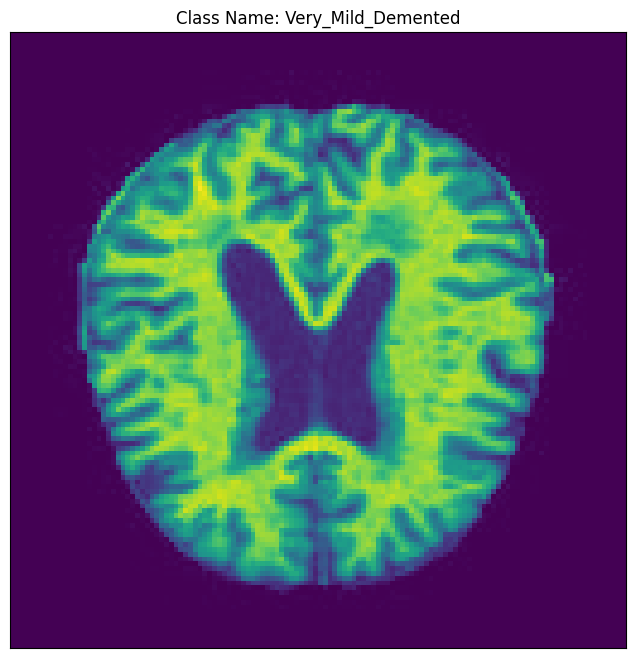

In [ ]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))

plot(str(Very_Mild_Demented),"Very_Mild_Demented")

<font size=5> Split the Dataset </font>

In [ ]:
batch_size = 64 # Increased batch size from 32 to 64 
img_height = 128 # Decreased image height from 224 to 128
img_width = 128 # Decreased image width from 224 to 128

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


<font size=5> Display example images </font>

In [ ]:
class_names = train_data.class_names
print(class_names)
train_data

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

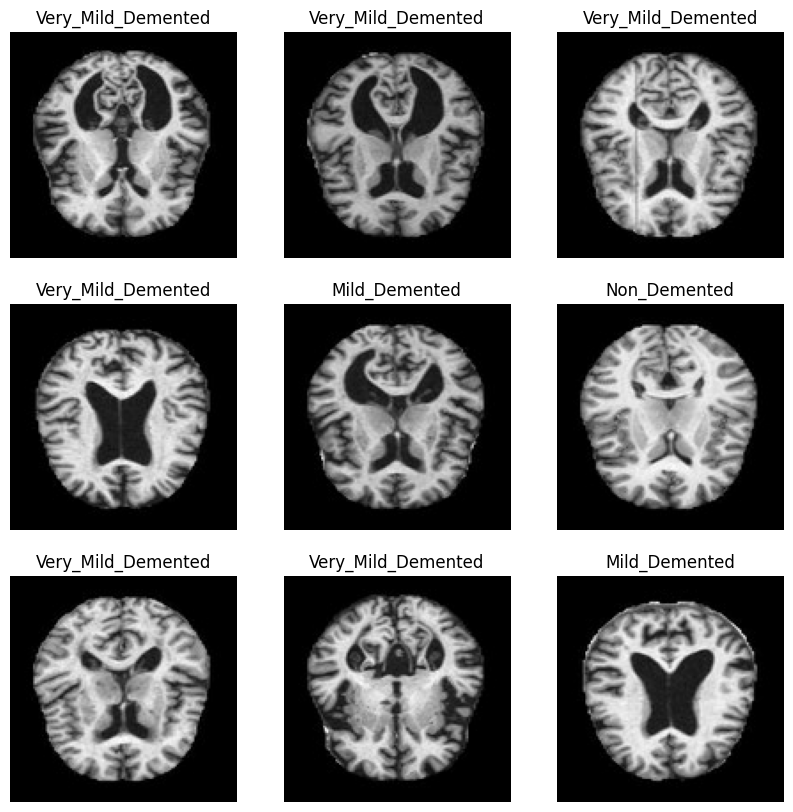

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<font size=5> Distribution of Data </font>

<function matplotlib.pyplot.show(close=None, block=None)>

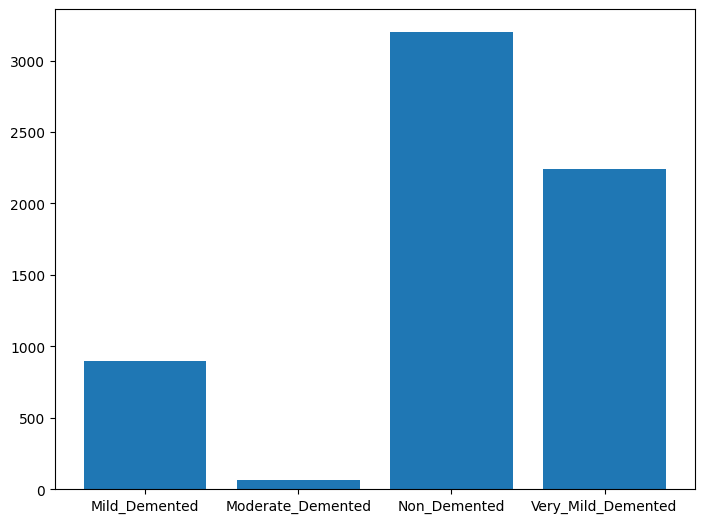

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

<font size=5> Build the model  </font>

In [ ]:
#Modified dropout layer from 1 layer (0.5) before the Flatten layer into 2 layers, 0.2 and 0.25 respectively

In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    
   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu', kernel_initializer="he_normal"),
  layers.MaxPooling2D(),

  layers.Dropout(0.20), 
    
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer="he_normal"),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer="he_normal"),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.25),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
  layers.Dense(64,"relu"),
  layers.Dense(4,activation="softmax")
])

<font size=5> Compile the model </font>


In [ ]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

<font size=5> Fit the model </font>

In [ ]:
epochs = 100 # Increased number of epoch from 5 to 100
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/100
80/80 [==============================] - 176s 2s/step - loss: 1.6054 - accuracy: 0.4727 - val_loss: 1.0385 - val_accuracy: 0.5109
Epoch 2/100
80/80 [==============================] - 126s 2s/step - loss: 1.0000 - accuracy: 0.5109 - val_loss: 0.9617 - val_accuracy: 0.5375
Epoch 3/100
80/80 [==============================] - 115s 1s/step - loss: 0.9426 - accuracy: 0.5408 - val_loss: 0.9072 - val_accuracy: 0.5406
Epoch 4/100
80/80 [==============================] - 116s 1s/step - loss: 0.9109 - accuracy: 0.5576 - val_loss: 0.9389 - val_accuracy: 0.5414
Epoch 5/100
80/80 [==============================] - 115s 1s/step - loss: 0.8862 - accuracy: 0.5768 - val_loss: 0.8282 - val_accuracy: 0.6016
Epoch 6/100
80/80 [==============================] - 116s 1s/step - loss: 0.8175 - accuracy: 0.6178 - val_loss: 0.7779 - val_accuracy: 0.6469
Epoch 7/100
80/80 [==============================] - 115s 1s/step - loss: 0.7654 - accuracy: 0.6510 - val_loss: 0.7117 - val_accuracy: 0.6969
Epoch 

<font size=5> Plot the result  </font>

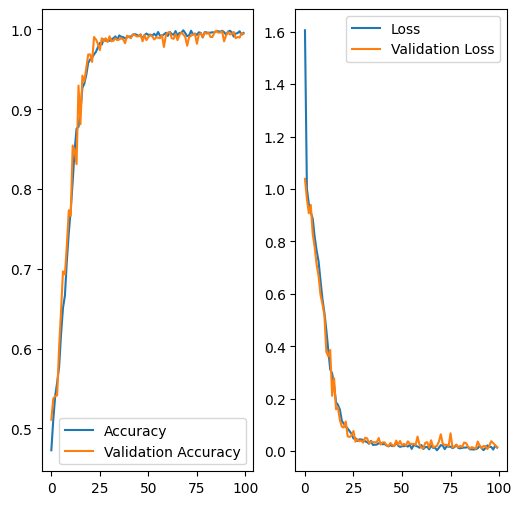

In [ ]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

<font size=5> Predictions </font>

1/1 [==============================] - 0s 29ms/step


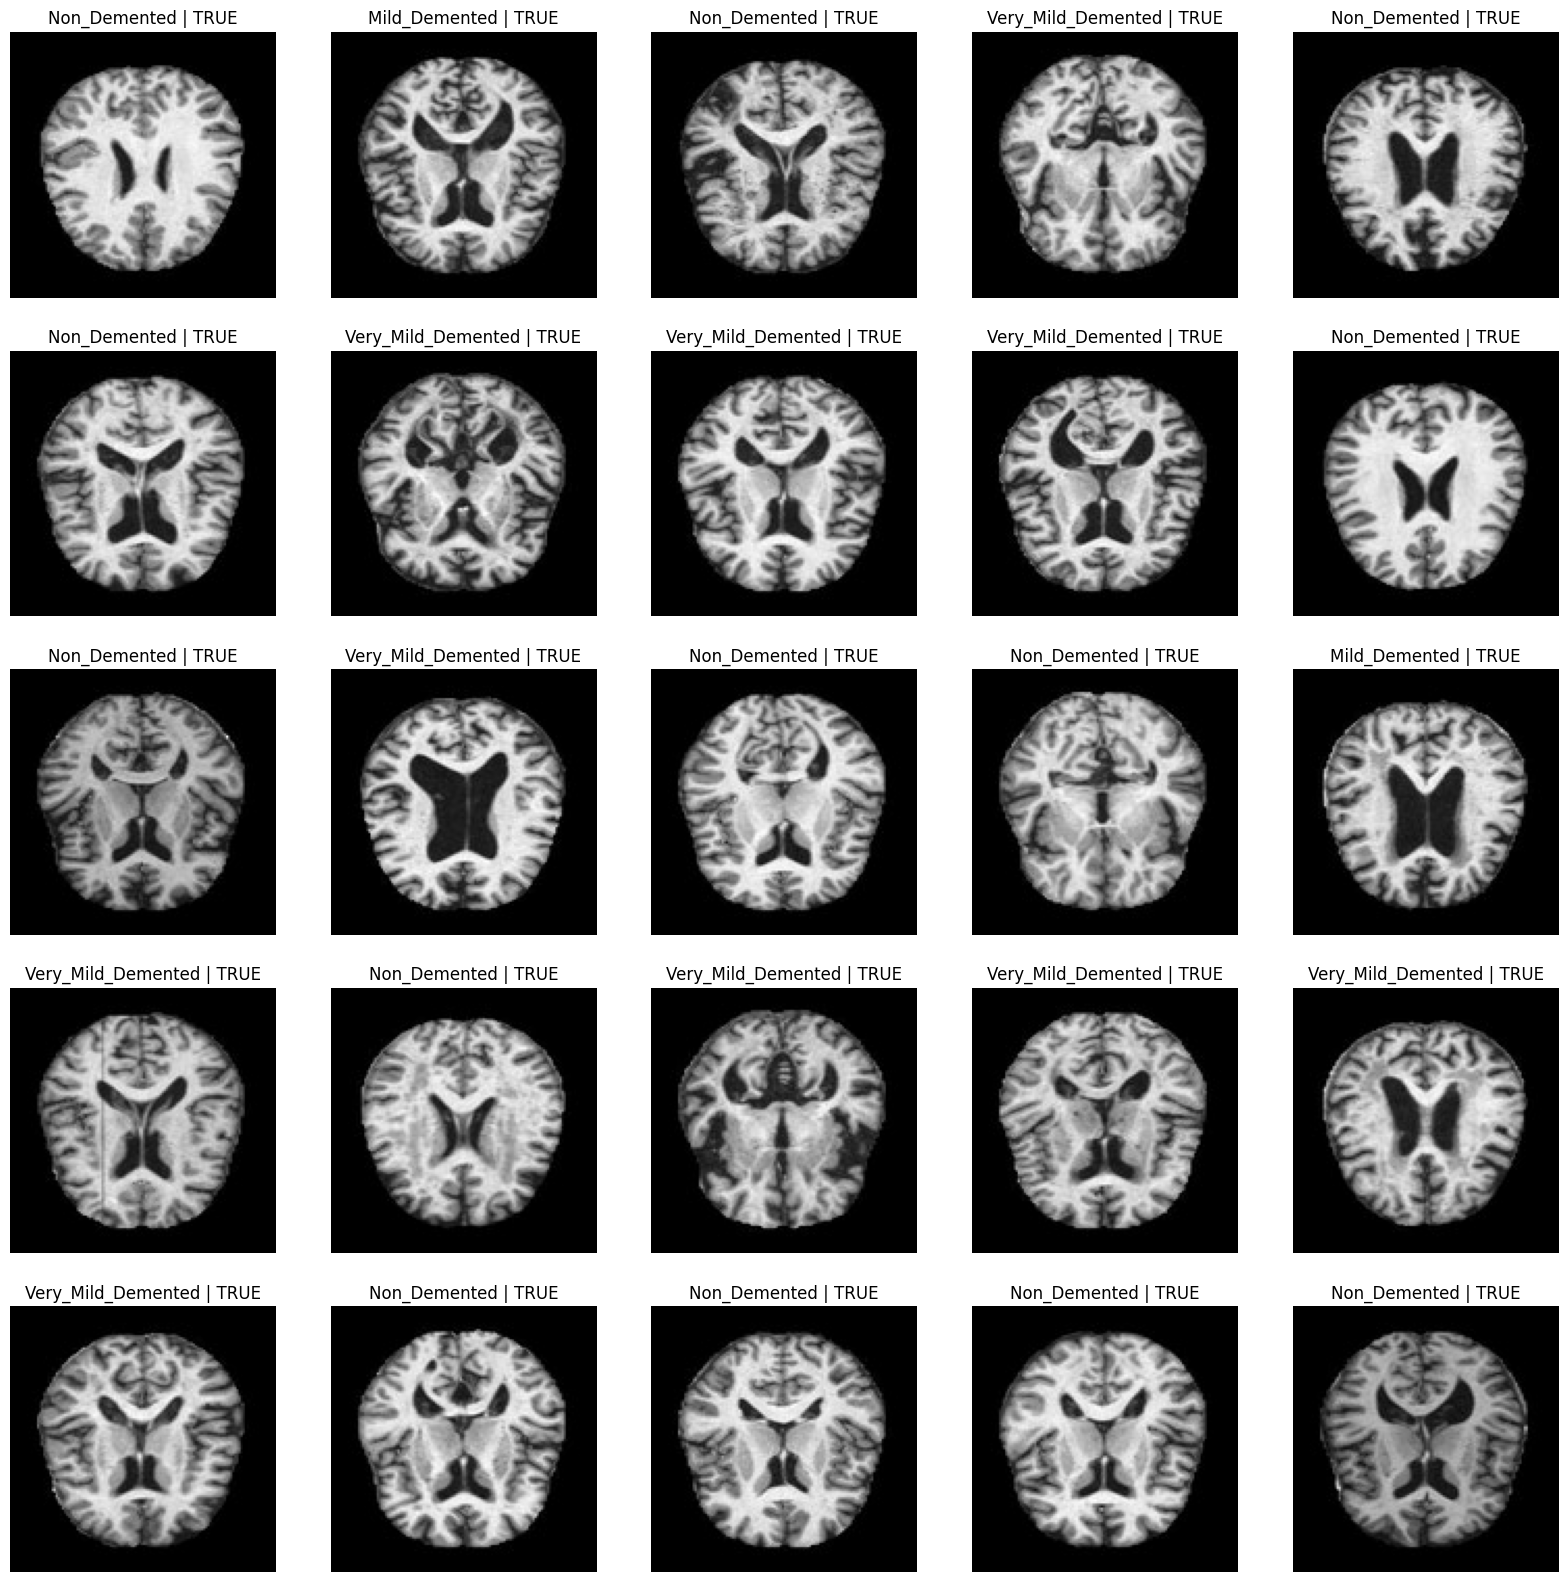

In [ ]:
plt.figure(figsize=(20, 20))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")